# Ted Talks | Exploratory Data Analysis 

In [2]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
plt.style.use('ggplot')
from sklearn.linear_model import LinearRegression

In [7]:
#load data and make into datafame
df = pd.read_csv('/Users/shemikalamare/Desktop/ga_tedtalks/data/ted_main.csv')
# %pwd

In [90]:
#review dataset
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,24-02-2006,43,Al Gore,Al Gore: Averting the climate crisis,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,23-02-2006,26,David Pogue,David Pogue: Simplicity sells,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,25-02-2006,35,Majora Carter,Majora Carter: Greening the ghetto,1,26-06-2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,21-02-2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,27-06-2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [9]:
#review shape of dataset
df.shape

(2550, 17)

In [10]:
#review columns to consider features and prediction questions
df.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

In [11]:
#undserand basic info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null int64
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(7), object(10)
memory usage: 338.8+ KB


In [12]:
#descriptive info on numerical data
df.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


In [13]:
#count the number of missing values
df.isnull().sum()
#there are only 6 missing columns, that is great!

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [87]:
#total number of views for ted talks
df.views.sum()

4330658578

List of Features:

comments              
description           
duration              
event                 
film_date             
languages             
main_speaker          
name                  
num_speaker           
published_date        
ratings               
related_talks         
speaker_occupation    
tags                  
title                 
url                   
views       

# Main Speaker

In [15]:
df_speaker = df.groupby('main_speaker').count().reset_index()[['main_speaker']].count()

In [16]:
df_speaker

main_speaker    2156
dtype: int64

In [17]:
df.head()
df.drop(["description", "event", "main_speaker", "name", "ratings", "related_talks", "speaker_occupation", "tags", "title", "url"], axis = 1).head()

,comments,duration,film_date,languages,num_speaker,published_date,views
0,4553,1164,1140825600,60,1,1151367060,47227110
1,265,977,1140825600,43,1,1151367060,3200520
2,124,1286,1140739200,26,1,1151367060,1636292
3,200,1116,1140912000,35,1,1151367060,1697550
4,593,1190,1140566400,48,1,1151440680,12005869


# Occupation

In [18]:
df.speaker_occupation.nunique

<bound method IndexOpsMixin.nunique of 0                                   Author/educator
1                                  Climate advocate
2                              Technology columnist
3                Activist for environmental justice
4              Global health expert; data visionary
5       Life coach; expert in leadership psychology
6                       Actor, comedian, playwright
7                                         Architect
8                  Philosopher, cognitive scientist
9                                    Pastor, author
10            Co-founder, Architecture for Humanity
11                                        Filmmaker
12                   Epidemiologist, philanthropist
13                Human-computer interface designer
14                                   Tech visionary
15                                        Violinist
16                                Pianist, composer
17                               inventor, engineer
18                       

In [88]:
### Linear Models for All Features

In [89]:
X = df.num_speaker#df.drop(["views"], axis = 1)
y = df.views


model = LinearRegression()
# model.fix(X,y)
X_test 


plt.figure()
plt.plot(X,y)
plt.show()

NameError: name 'X_test' is not defined

### Speakers

In [22]:
df['speaker_occupation'].unique()

array(['Author/educator', 'Climate advocate', 'Technology columnist', ...,
       'Historian, philosopher', 'Astrobiologist', ' Robotics engineer'],
      dtype=object)

In [23]:
df['speaker_occupation'].value_counts().head(30)
#there are some speaker occupations that are only listed once
#and they could be categorized with the other option
#example: bee expert, could be Biologist

Writer                                  45
Artist                                  34
Designer                                34
Journalist                              33
Entrepreneur                            31
Architect                               30
Inventor                                27
Psychologist                            26
Photographer                            25
Filmmaker                               21
Author                                  20
Educator                                20
Neuroscientist                          20
Economist                               20
Philosopher                             16
Roboticist                              16
Biologist                               15
Physicist                               14
Musician                                11
Marine biologist                        11
Global health expert; data visionary    10
Activist                                10
Technologist                            10
Singer/song

In [24]:
top_speakers = df['speaker_occupation'].value_counts().head(10)


In [25]:
top_occupation = top_speakers.iloc[::-1] #reverse order to make easer to view on graph

# df = df.iloc[::-1]

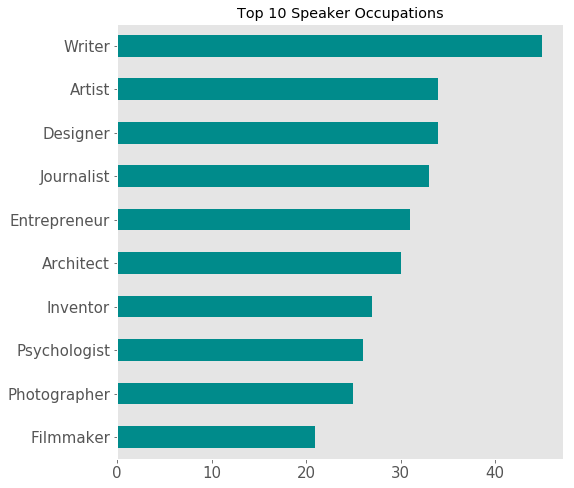

In [26]:
top_occupation.plot(kind='barh', fontsize = 15, grid=False, title="Top 10 Speaker Occupations", color='DarkCyan', figsize = (8,8))

# df.languages.plot(kind = 'hist', bins = 5, figsize = (8,8), grid=False, fontsize = 15, title="Number of Languages in which the Talk is Available", color='DarkCyan')

In [27]:
# df['month'] = df['film_date'].apply(lambda x: month_order[int(x.split('-')[1]) - 1])

# month_df = pd.DataFrame(df['month'].value_counts()).reset_index()
# month_df.columns = ['month', 'name']

In [28]:
# df['speakers'].value_counts()
# I dont think these are as pertitent since TEDx decides how many speakers

In [29]:
# df['related_talks']
#looks interesting not sure I know how or have the time to do this now

In [30]:
#potential predictions:
 #views
 #features:
 #tags, duration, event, languages, num_speakers, related talks, speaker_occupation, ratings (maybe)

In [31]:
df.ratings.head(15)

0     [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1     [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2     [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3     [{'id': 3, 'name': 'Courageous', 'count': 760}...
4     [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
5     [{'id': 7, 'name': 'Funny', 'count': 1102}, {'...
6     [{'id': 3, 'name': 'Courageous', 'count': 477}...
7     [{'id': 9, 'name': 'Ingenious', 'count': 195},...
8     [{'id': 3, 'name': 'Courageous', 'count': 562}...
9     [{'id': 21, 'name': 'Unconvincing', 'count': 8...
10    [{'id': 3, 'name': 'Courageous', 'count': 169}...
11    [{'id': 1, 'name': 'Beautiful', 'count': 70}, ...
12    [{'id': 8, 'name': 'Informative', 'count': 188...
13    [{'id': 9, 'name': 'Ingenious', 'count': 1014}...
14    [{'id': 3, 'name': 'Courageous', 'count': 83},...
Name: ratings, dtype: object

# Analysis of Each Feature

### Features:

film_date: The Unix timestamp of the filming.
published_date: The Unix timestamp for the publication of the talk on TED.com
ratings: A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.)


tags: The themes associated with the talk. #count vectorizer 
views: The number of views on the talk.
comments: The number of first level comments made on the talk.
languages: The number of languages in which the talk is available.
duration: The duration of the talk in seconds.
num_speaker: The number of speakers in the talk.
event: The TED/TEDx event where the talk took place.


Features not using:
url: The URL of the talk.
name: The official name of the TED Talk. Includes the title and the speaker.
title: The title of the talk
description: A blurb of what the talk is about.
main_speaker: The first named speaker of the talk.
speaker_occupation: The occupation of the main speaker.

maybe: related_talks: A list of dictionaries of recommended talks to watch next.

### Film Date

In [32]:
df.film_date.head()

0    1140825600
1    1140825600
2    1140739200
3    1140912000
4    1140566400
Name: film_date, dtype: int64

In [33]:
import datetime
df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

In [34]:
# df.plot(kind = "bar", x = "published_date", y = "views", figsize = (8,8))

### Tags


tags: The themes associated with the talk. #count vectorizer 

In [35]:
df.tags.head(10)

0    ['children', 'creativity', 'culture', 'dance',...
1    ['alternative energy', 'cars', 'climate change...
2    ['computers', 'entertainment', 'interface desi...
3    ['MacArthur grant', 'activism', 'business', 'c...
4    ['Africa', 'Asia', 'Google', 'demo', 'economic...
5    ['business', 'culture', 'entertainment', 'goal...
6    ['Christianity', 'God', 'atheism', 'comedy', '...
7    ['architecture', 'collaboration', 'culture', '...
8    ['God', 'TED Brain Trust', 'atheism', 'brain',...
9    ['Christianity', 'God', 'culture', 'happiness'...
Name: tags, dtype: object

In [36]:
tags = df.tags

countv = CountVectorizer(max_features=100)

tag_dtm = countv.fit_transform(tags)

NameError: name 'CountVectorizer' is not defined

In [37]:
tag_df = pd.DataFrame(tag_dtm.toarray(), columns=countv.get_feature_names())
tag_df.head()

NameError: name 'tag_dtm' is not defined

In [38]:
tag_df.shape

NameError: name 'tag_df' is not defined

### Views
Looking at views independently and also in relation to other features

Views: The number of views on the talk.

In [39]:
# df.views

In [40]:
df.views.describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

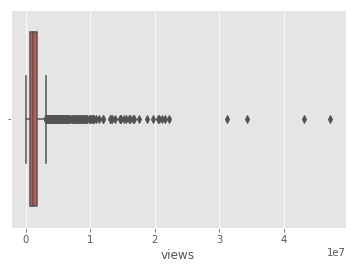

In [41]:
sns.boxplot(df.views)

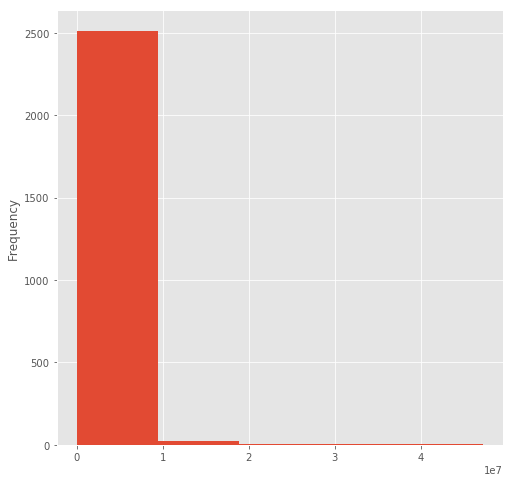

In [42]:
df.views.plot(kind = 'hist', bins = 5, figsize = (8,8))

/anaconda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


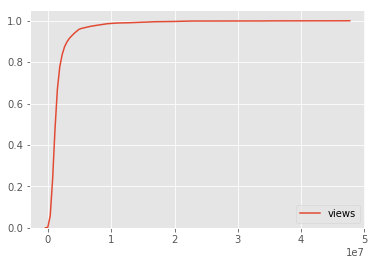

In [43]:
sns.kdeplot(df.views, cumulative = True)

### Observations

The views tell us 


### Comments
Looking at comments independently and also in relation to other features

Comments: The number of first level comments made on the talk.

In [44]:
df.comments.head()

0    4553
1     265
2     124
3     200
4     593
Name: comments, dtype: int64

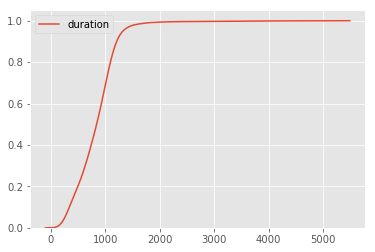

In [45]:
sns.kdeplot(df.duration, cumulative = True)

In [46]:
df.comments.describe()

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

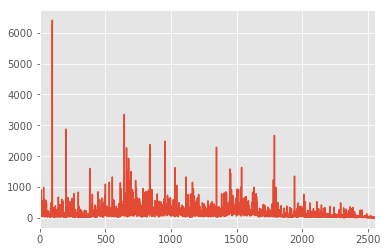

In [47]:
df.comments.plot()

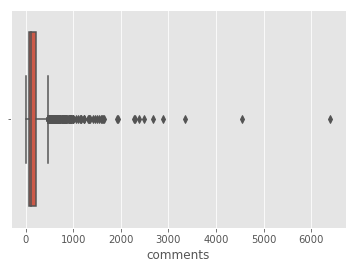

In [48]:
sns.boxplot(df.comments)

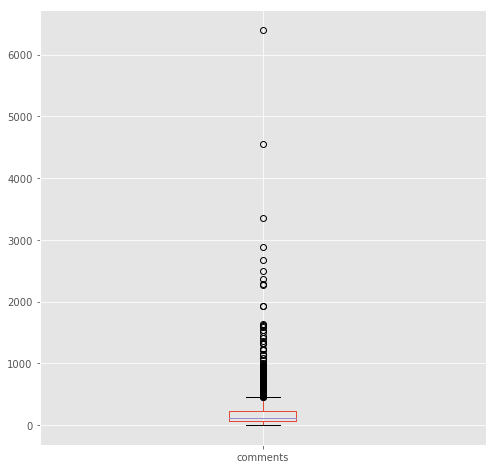

In [49]:
df.comments.plot(kind = 'box', figsize = (8,8))

### Observations

We can see that

### Language
Looking at comments independently and also in relation to other features

Languages: The number of languages in which the talk is available.

In [50]:
df.languages.head()

0    60
1    43
2    26
3    35
4    48
Name: languages, dtype: int64

In [51]:
df.languages.describe()

count    2550.000000
mean       27.326275
std         9.563452
min         0.000000
25%        23.000000
50%        28.000000
75%        33.000000
max        72.000000
Name: languages, dtype: float64

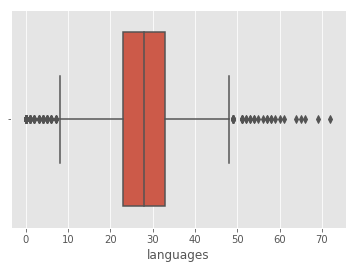

In [52]:
sns.boxplot(df.languages)

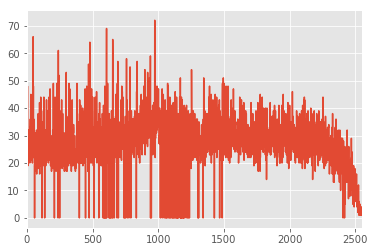

In [53]:
df.languages.plot()

In [54]:
import pylab as pl
from pandas import *


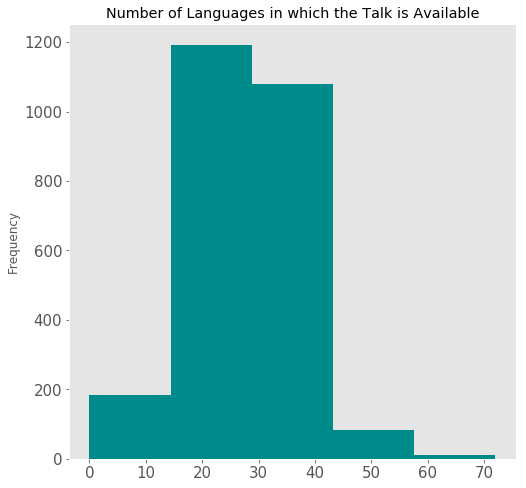

In [55]:
df.languages.plot(kind = 'hist', \
                  bins = 5, \
                  figsize = (8,8), \
                  grid=False, \
                  fontsize = 15, \
                  title="Number of Languages in which the Talk is Available", \
                  color='DarkCyan')

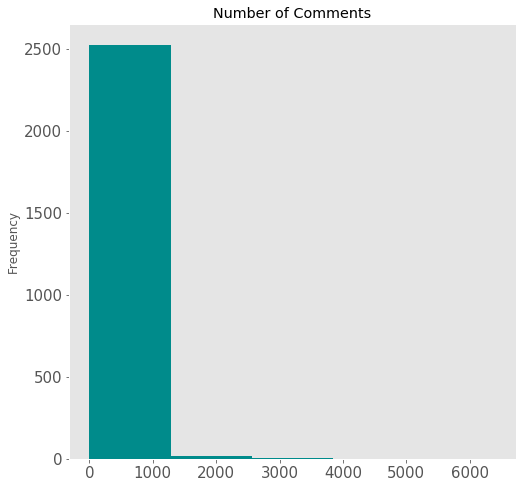

In [56]:
df.comments.plot(kind = 'hist', \
                  bins = 5, \
                  figsize = (8,8), \
                  grid=False, \
                  fontsize = 15, \
                  title="Number of Comments", \
                  color='DarkCyan')

In [57]:
### Observations

In [58]:
We can see that

SyntaxError: invalid syntax (<ipython-input-58-e0898253320d>, line 1)


### Duration
Looking at comments independently and also in relation to other features

Duration: The duration of the talk in seconds.

In [59]:
df.duration.describe() 

count    2550.000000
mean      826.510196
std       374.009138
min       135.000000
25%       577.000000
50%       848.000000
75%      1046.750000
max      5256.000000
Name: duration, dtype: float64

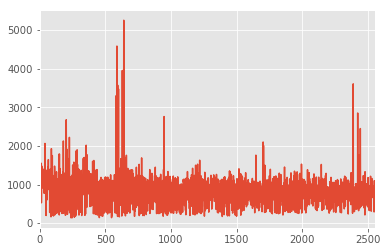

In [60]:
df.duration.plot()

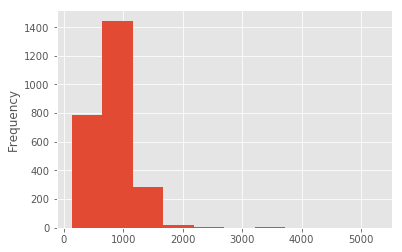

In [61]:
df.duration.plot( kind = 'hist')

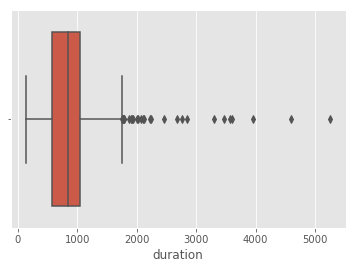

In [62]:
sns.boxplot(df.duration)

### Observations

In [63]:
We can see that

SyntaxError: invalid syntax (<ipython-input-63-e0898253320d>, line 1)

### Number of Speakers

num_speaker: The number of speakers in the talk.

In [64]:
df.num_speaker.describe()

count    2550.000000
mean        1.028235
std         0.207705
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: num_speaker, dtype: float64

In [65]:
df_speaker_count = df.num_speaker.value_counts()

In [66]:
df_speaker_count

1    2492
2      49
3       5
4       3
5       1
Name: num_speaker, dtype: int64

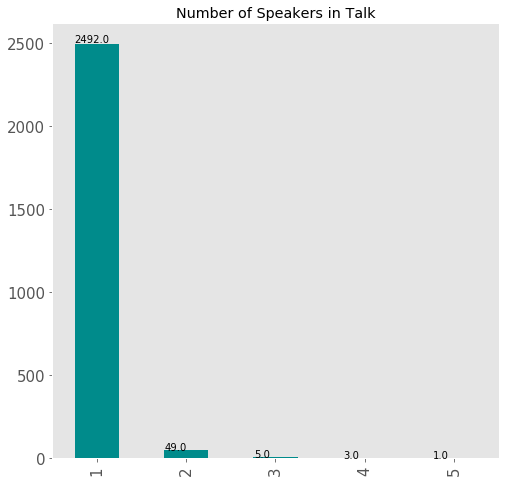

In [67]:
ax = df_speaker_count.plot(kind = 'bar', title = "Number of Speakers in Talk", grid=False, fontsize = 15, color = 'DarkCyan', figsize = (8,8))

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

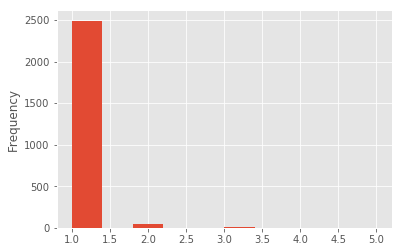

In [68]:
df.num_speaker.plot( kind = 'hist')

### Observations

We can see that

### Event
Event: The TED/TEDx event where the talk took place.

In [69]:
df.groupby("event").size().count() #355

355

In [70]:
df.event.value_counts()

TED2014                    84
TED2009                    83
TED2013                    77
TED2016                    77
TED2015                    75
TEDGlobal 2012             70
TED2011                    70
TEDGlobal 2011             68
TED2010                    68
TED2007                    68
TED2017                    67
TEDGlobal 2013             66
TEDGlobal 2009             65
TED2012                    65
TED2008                    57
TEDGlobal 2010             55
TEDGlobal 2014             51
TED2006                    45
TED2005                    37
TEDIndia 2009              35
TEDSummit                  34
TEDWomen 2010              34
TED2003                    34
TED2004                    31
TED2002                    28
TEDWomen 2015              28
TEDGlobal 2007             27
TEDGlobal 2005             26
TEDWomen 2016              25
TEDxBeaconStreet           22
                           ..
TEDxPittsburgh              1
TED1994                     1
TEDxJaffa 

In [71]:
df.event.describe()

count        2550
unique        355
top       TED2014
freq           84
Name: event, dtype: object

In [72]:
df.related_talks.head()

0    [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...
1    [{'id': 243, 'hero': 'https://pe.tedcdn.com/im...
2    [{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...
3    [{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...
4    [{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...
Name: related_talks, dtype: object

In [73]:
df.tags.head()

0    ['children', 'creativity', 'culture', 'dance',...
1    ['alternative energy', 'cars', 'climate change...
2    ['computers', 'entertainment', 'interface desi...
3    ['MacArthur grant', 'activism', 'business', 'c...
4    ['Africa', 'Asia', 'Google', 'demo', 'economic...
Name: tags, dtype: object

In [74]:
top_talks = df[["title","views", "film_date", "duration", "comments", "num_speaker"]].sort_values('views', ascending=False)
top_talks

,title,views,film_date,duration,comments,num_speaker
0,Do schools kill creativity?,47227110,24-02-2006,1164,4553,1
1346,Your body language may shape who you are,43155405,25-06-2012,1262,2290,1
677,How great leaders inspire action,34309432,16-09-2009,1084,1930,1
837,The power of vulnerability,31168150,05-06-2010,1219,1927,1
452,10 things you didn't know about orgasm,22270883,05-02-2009,1003,354,1
1776,How to speak so that people want to listen,21594632,09-06-2013,598,297,1
201,My stroke of insight,21190883,26-02-2008,1099,2877,1
5,Why we do what we do,20685401,01-02-2006,1305,672,1
2114,This is what happens when you reply to spam email,20475972,07-12-2015,588,150,1
1416,"Looks aren't everything. Believe me, I'm a model.",19787465,26-10-2012,577,846,1


In [75]:
df_test = top_talks.copy()

In [76]:
df_test.index

Int64Index([   0, 1346,  677,  837,  452, 1776,  201,    5, 2114, 1416,
            ...
            1178, 1104, 1079, 1141, 1229, 1133,  776,  237, 1112,  594],
           dtype='int64', length=2550)

In [77]:
df.set_index(np.arange(len(df.index)))

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,24-02-2006,43,Al Gore,Al Gore: Averting the climate crisis,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,23-02-2006,26,David Pogue,David Pogue: Simplicity sells,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,25-02-2006,35,Majora Carter,Majora Carter: Greening the ghetto,1,26-06-2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,21-02-2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,27-06-2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869
5,672,"Tony Robbins discusses the ""invisible forces"" ...",1305,TED2006,01-02-2006,36,Tony Robbins,Tony Robbins: Why we do what we do,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,https://www.ted.com/talks/tony_robbins_asks_wh...,20685401
6,919,When two young Mormon missionaries knock on Ju...,992,TED2006,23-02-2006,31,Julia Sweeney,Julia Sweeney: Letting go of God,1,09-07-2006,"[{'id': 3, 'name': 'Courageous', 'count': 477}...","[{'id': 22, 'hero': 'https://pe.tedcdn.com/ima...","Actor, comedian, playwright","['Christianity', 'God', 'atheism', 'comedy', '...",Letting go of God,https://www.ted.com/talks/julia_sweeney_on_let...,3769987
7,46,Architect Joshua Prince-Ramus takes the audien...,1198,TED2006,22-02-2006,19,Joshua Prince-Ramus,Joshua Prince-Ramus: Behind the design of Seat...,1,09-07-2006,"[{'id': 9, 'name': 'Ingenious', 'count': 195},...","[{'id': 750, 'hero': 'https://pe.tedcdn.com/im...",Architect,"['architecture', 'collaboration', 'culture', '...",Behind the design of Seattle's library,https://www.ted.com/talks/joshua_prince_ramus_...,967741
8,852,Philosopher Dan Dennett calls for religion -- ...,1485,TED2006,01-02-2006,32,Dan Dennett,Dan Dennett: Let's teach religion -- all relig...,1,17-07-2006,"[{'id': 3, 'name': 'Courageous', 'count': 562}...","[{'id': 71, 'hero': 'https://pe.tedcdn.com/ima...","Philosopher, cognitive scientist","['God', 'TED Brain Trust', 'atheism', 'brain',...",Let's teach religion -- all religion -- in sch...,https://www.ted.com/talks/dan_dennett_s_respon...,2567958
9,900,"Pastor Rick Warren, author of ""The Purpose-Dri...",1262,T

In [78]:
# df_test.set_index()

In [79]:
from pandas import *
idx = Int64Index(df_test.index)
df_test2 = DataFrame(index = idx, data =(np.arange(len(df_test.index))))
print(df_test2)

         0
0        0
1346     1
677      2
837      3
452      4
1776     5
201      6
5        7
2114     8
1416     9
500     10
1163    11
1036    12
2109    13
1129    14
553     15
596     16
1579    17
2161    18
29      19
1572    20
176     21
262     22
530     23
381     24
1501    25
4       26
1940    27
47      28
892     29
...    ...
1486  2520
1093  2521
1198  2522
292   2523
2507  2524
1192  2525
649   2526
323   2527
1149  2528
1250  2529
1223  2530
1237  2531
1105  2532
1119  2533
581   2534
590   2535
1053  2536
1301  2537
1179  2538
1061  2539
1178  2540
1104  2541
1079  2542
1141  2543
1229  2544
1133  2545
776   2546
237   2547
1112  2548
594   2549

[2550 rows x 1 columns]


In [80]:
df2 = df_test2
df2.rename(index=str, columns={0: "rank"}, inplace=True )
# df2

In [81]:
df.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)

df3 = pd.concat([df, df2], axis=1 )

In [82]:
df4 = df3.drop(["Auction_Rank","view_Rank"], axis=1)

ValueError: labels ['Auction_Rank' 'view_Rank'] not contained in axis

In [83]:
df4.tail()

NameError: name 'df4' is not defined

In [84]:
df4.columns

NameError: name 'df4' is not defined

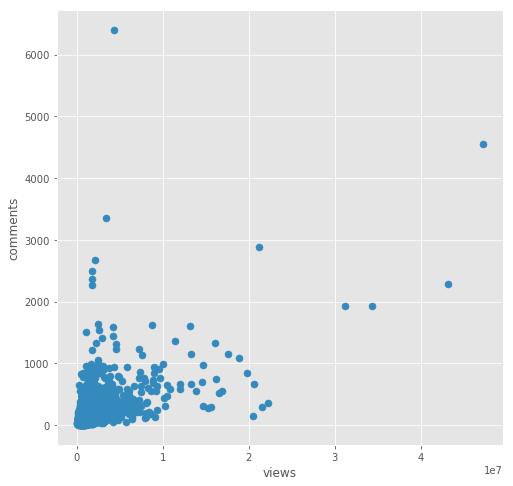

In [85]:
df.plot(kind = 'scatter', x = 'views', y = 'comments', s = 50, figsize = (8,8))

In [ ]:
df.plot(kind = 'scatter', x = 'views', y = 'languages', figsize = (8,8))

In [ ]:
df.plot(kind = 'scatter', x = 'duration', y ='views')

#lm plot with seaborn and doing a regression line

In [ ]:
sns.pairplot(df[['views', 'duration']])

In [ ]:
df.views.plot(kind = 'hist', figsize = (8, 8))

In [ ]:
# df.views

# Features: Analysis

List of Columns: 'comments', 'description', 'duration', 'event', 'film_date','languages', 'main_speaker', 'name', 'num_speaker', 'published_date','ratings', 'related_talks', 'speaker_occupation', 'tags', 'title', 'url', 'views'    

Ted Talks: Comments

In [ ]:
# df.comments
#number of comments for each video

In [ ]:
df.comments.plot(kind = 'hist', figsize = (8,8))
#df.Beds.plot(kind = 'hist', figsize = (8, 8))